In [1]:
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import pandas as pd

In [72]:
actor_lrs = []
critic_lrs = []
performances = []
for suffix in ['', '-fix', '-fix2']:
    for path_perf, path_params in zip(
            glob(f'../dat/runs/ppo-linear{suffix}/working_directories/*/performance.npy'),
            glob(f'../dat/runs/ppo-linear{suffix}/working_directories/*/param_choice.csv')
        ):
        performances.append(np.load(path_perf))
        params = pd.read_csv(path_params)
        actor_lrs.append(params['actor_lr'].values[0])
        critic_lrs.append(params['critic_lr'].values[0])

performances = np.array(performances)
actor_lrs = np.array(actor_lrs)
critic_lrs = np.array(critic_lrs)

In [73]:
performances = performances.mean(-1)

In [74]:
alrs = np.unique(actor_lrs)
clrs = np.unique(critic_lrs)

means = np.array([
    [performances[(actor_lrs == alr) & (critic_lrs == clr), -10:].mean() for alr in alrs] for clr in clrs
])


alr_best, clr_best = np.unravel_index(means.argmax(), means.shape)
perfs = performances[(actor_lrs == alrs[alr_best]) & (critic_lrs == clrs[clr_best])]

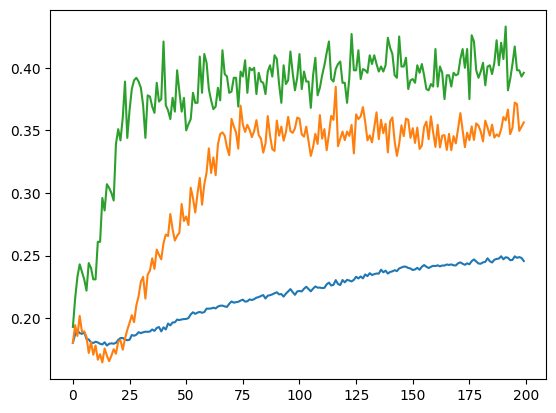

In [76]:
plt.plot(performances.mean(0))
plt.plot(perfs.mean(0))
plt.plot(performances.max(0))

In [4]:
performances[actor_lrs == 0.001]

array([[0.193, 0.193, 0.172, ..., 0.238, 0.265, 0.24 ],
       [0.177, 0.172, 0.201, ..., 0.275, 0.296, 0.262],
       [0.191, 0.195, 0.188, ..., 0.255, 0.281, 0.264],
       ...,
       [0.193, 0.193, 0.172, ..., 0.251, 0.224, 0.222],
       [0.177, 0.172, 0.187, ..., 0.233, 0.214, 0.206],
       [0.191, 0.195, 0.188, ..., 0.254, 0.268, 0.241]])

In [5]:
performances.shape

(180, 200)

In [6]:
alrs = np.unique(actor_lrs)
clrs = np.unique(critic_lrs)

means = np.array([
    [performances[(actor_lrs == alr) & (critic_lrs == clr), -10:].mean() for alr in alrs] for clr in clrs
])

In [7]:
means

array([[0.1852 , 0.17928, 0.1558 , 0.14752, 0.1439 , 0.14562],
       [0.17694, 0.1752 , 0.16648, 0.16016, 0.17066, 0.16934],
       [0.19066, 0.21446, 0.24922, 0.27332, 0.28498, 0.28088],
       [0.2037 , 0.24912, 0.31292, 0.34282, 0.3488 , 0.34892],
       [0.20826, 0.26164, 0.3201 , 0.33588, 0.35864, 0.3523 ],
       [0.211  , 0.25828, 0.30692, 0.3361 , 0.3465 , 0.3453 ]])

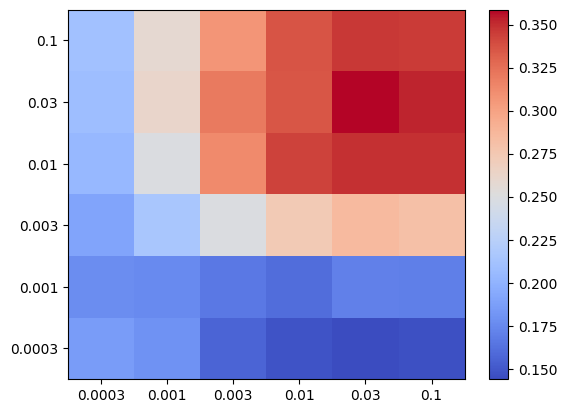

In [13]:
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(alrs)) + 0.5)
ax.set_yticks(np.arange(len(clrs)) + 0.5)
ax.set_xticklabels(alrs)
ax.set_yticklabels(clrs)
I = ax.pcolormesh(
    means,
    cmap='coolwarm')
fig.colorbar(I, ax=ax)

In [83]:
actor_lrs = []
critic_lrs = []
performances = []
for suffix in ['', '-fix', '-fix2']:
    for path_perf, path_params in zip(
            glob(f'../dat/runs/ppo-gnn{suffix}/working_directories/*/performance.npy'),
            glob(f'../dat/runs/ppo-gnn{suffix}/working_directories/*/param_choice.csv')
        ):
        performances.append(np.load(path_perf))
        params = pd.read_csv(path_params)
        actor_lrs.append(params['actor_lr'].values[0])
        critic_lrs.append(params['critic_lr'].values[0])

performances = np.array(performances).mean(-1)
actor_lrs = np.array(actor_lrs)
critic_lrs = np.array(critic_lrs)

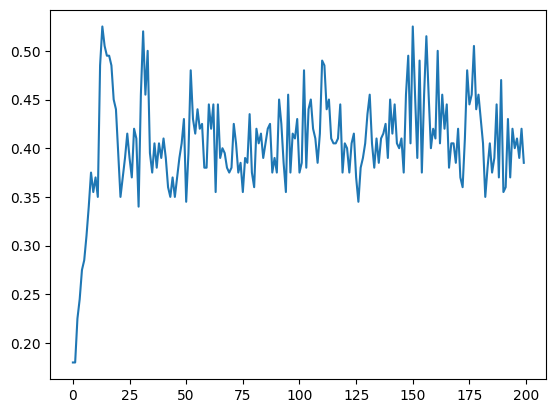

In [84]:
plt.plot(performances.max(0)[:200])

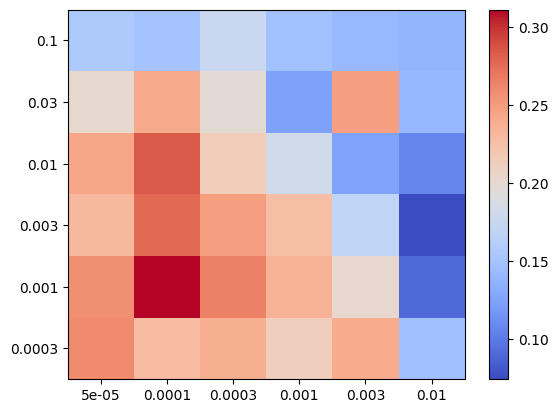

In [85]:
alrs = np.unique(actor_lrs)
clrs = np.unique(critic_lrs)

means = np.array([
    [performances[(actor_lrs == alr) & (critic_lrs == clr), -100:].mean() for alr in alrs] for clr in clrs
])
fig, ax = plt.subplots()
ax.set_xticks(np.arange(len(alrs)) + 0.5)
ax.set_yticks(np.arange(len(clrs)) + 0.5)
ax.set_xticklabels(alrs)
ax.set_yticklabels(clrs)
I = ax.pcolormesh(
    means,
    cmap='coolwarm')
fig.colorbar(I, ax=ax)

In [86]:
alr_best, clr_best = np.unravel_index(means.argmax(), means.shape)
perfs = performances[(actor_lrs == alrs[alr_best]) & (critic_lrs == clrs[clr_best])]

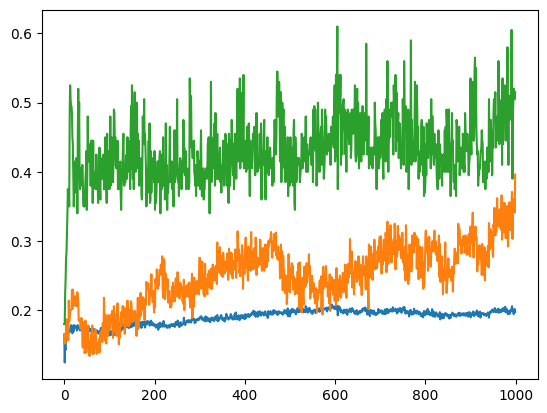

In [89]:
plt.plot(performances.mean(0))
plt.plot(perfs.mean(0))
plt.plot(performances.max(0))